<a href="https://colab.research.google.com/github/jjomathew98/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Chi-Square Test:

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

In [46]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/nys-opioid-visits/All_Payer_Opioid-Related_Facility_Visits_in_New_York_State__Beginning_2010__SPARCS_.csv')

In [47]:
print(df.columns)
print(df.head())

Index(['Year', 'Patient County Code', 'Patient County Name', 'Rural/Urban',
       'Payer', 'ER Opioid', 'ER Visits ', 'ER Rate Per 1000 ',
       'Inpatient ER Opioid', 'Inpatient ER Discharges',
       'Inpatient ER Rate Per 1000', 'Inpatient Non ER Opioid',
       'Inpatient Non ER Discharges', 'Inpatient Non ER Rate Per 1000 ',
       'Inpatient Total Opioid', 'Inpatient Total Discharges',
       'Inpatient Total Rate Per 1000 ', 'ER Inpatient Total Opioid',
       'ER Inpatient Total Discharges ', 'ER Inpatient Total Rate Per 1000',
       'Opioid Ambulatory Surgery Visits', 'Ambulatory Surgery Visits',
       'Ambulatory Surgery Rate Per 1000', 'Outpatient Opioid',
       'Outpatient Visits', 'Outpatient Rate Per 1000',
       'Other Outpatient Total Opioid', ' Other Outpatient Total Discharges',
       'Other Outpatient Total Rate Per 1000', 'Overall Opioid',
       'Overall Discharges', 'Overall Rate Per 1000'],
      dtype='object')
   Year  Patient County Code Patient County 

In [48]:
df['Rural/Urban'].value_counts()
df['Payer'].value_counts()

Medicaid      390
Medicare      390
Other         390
Commercial    390
Unknown       384
All Payers      6
Name: Payer, dtype: int64

In [49]:
contingency_table = pd.crosstab(df['Rural/Urban'], df['Payer'])
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

Payer        All Payers  Commercial  Medicaid  Medicare  Other  Unknown
Rural/Urban                                                            
Rural                 0         144       144       144    144      142
State                 6           6         6         6      6        6
Urban                 0         240       240       240    240      236
Chi2 value: 319.98611827610137
P-value: 9.183664413295381e-63


#Interpretation
### From the significant p-value, we can conclude that there is a relationship between the Payer and Rural/Urban variables. In other words, the type of payer is associated with whether the area is rural or urban. The chi-squared test suggests that these variables are not independent of each other in the given dataset.

# 2. T Test

In [61]:
!pip install scipy
import pandas as pd
from scipy.stats import ttest_ind

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/nys-opioid-visits/All_Payer_Opioid-Related_Facility_Visits_in_New_York_State__Beginning_2010__SPARCS_.csv')
len(df)

1950

In [63]:
df = df.dropna()
len(df)

1854

In [70]:
# Separate ER Visits data for rural and urban areas
er_visits_rural = df[df['Rural/Urban'] == 'Rural']['ER Visits ']
er_visits_urban = df[df['Rural/Urban'] == 'Urban']['ER Visits ']

try:
    # Perform the t-test
    t_stat, p_val = ttest_ind(er_visits_rural, er_visits_urban, equal_var=False)

    # Print the t-statistic and p-value
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_val}")

    # Compute means for ER Visits data for rural and urban areas
    er_visits_rural_mean = er_visits_rural.mean()
    er_visits_urban_mean = er_visits_urban.mean()

    print(f"Mean prevalence for ER Visits rural: {er_visits_rural_mean}")
    print(f"Mean prevalence for ER Visits urban: {er_visits_urban_mean}")

except Exception as e:
    print("An error occurred:", e)

T-statistic: -13.338478225239799
P-value: 6.199851925306439e-38
Mean prevalence for ER Visits rural: 4651.139296187684
Mean prevalence for ER Visits urban: 31504.4385665529


## Interpretation

The strategy we use for the purpose of interpretation is:
  If the p-value is less than your chosen significance level (e.g., 0.05), you would reject the null hypothesis and conclude that there is a significant difference in ER Visits per 1000 people between rural and urban areas.
  If the p-value is greater than 0.05, you would fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude a significant difference in ER Visits between rural and urban areas.


Since P-value is greater than 0.05 we can say that we would fail to reject the null hypothesis, suggesting that there is not enough evidence to conclude a significant difference in ER Visits between rural and urban areas.

# 3. Anova

In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

############################################################
################Creating the data###########################
############################################################

# Read in the data
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/nys-opioid-visits/All_Payer_Opioid-Related_Facility_Visits_in_New_York_State__Beginning_2010__SPARCS_.csv') # noqa

df.columns

# Vars to keep: Year, Patient County Name, Rural/Urban, Payer, Overall Opioid
## Overall Opioid: Grand Total All Opioid Visits (Emergency Room + Inpatient + Ambulatory Surgery + Outpatient)

df2 = df[['Rural/Urban', 'Payer', 'Overall Opioid']] # noqa

# ## create new version where we add up Overall Opioid, groupped by Patient Count Name
# df2 = df.groupby(['Rural/Urban', 'Payer'])['Overall Opioid'].sum().reset_index() # noqa

## drop where Rural/Urban is equal to 'State'
df2 = df2[df2['Rural/Urban'] != 'State']

## clean up column names, replace spaces with underscores, remove special characters and make lowercase # noqa
df2.columns = df2.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower() # noqa

## save as temp file
df2.to_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK5/examples/data/nys-opioid-visits/All_Payer_Opioid-Related_Facility_Visits_in_New_York_State__Beginning_2010__SPARCS_.csv', index=False) # noqa

############################################################
############################################################
############################################################

df2.dtypes

print(df2.isnull().sum())
print(df2.describe())

model = ols('overall_opioid ~ C(payer) * C(rural_urban)', data=df2).fit()

# Performing the two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

## get means for each payer group of overall opioid
df2.groupby('payer')['overall_opioid'].mean()

<ipython-input-54-51be800d16b3>:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2.columns = df2.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower() # noqa
<ipython-input-54-51be800d16b3>:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2.columns = df2.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.lower() # noqa


rural_urban       0
payer             0
overall_opioid    0
dtype: int64
       overall_opioid
count     1914.000000
mean        27.364681
std         64.017458
min          0.000000
25%          1.000000
50%          6.000000
75%         19.000000
max        663.000000
                               sum_sq      df           F        PR(>F)
C(payer)                 9.573150e+05     4.0   76.381109  3.918643e-60
C(rural_urban)           5.357190e+05     1.0  170.973254  1.772630e-37
C(payer):C(rural_urban)  3.805419e+05     4.0   30.362222  1.580212e-24
Residual                 5.965898e+06  1904.0         NaN           NaN


payer
Commercial    48.244792
Medicaid      55.406250
Medicare      28.630208
Other          2.768229
Unknown        1.367725
Name: overall_opioid, dtype: float64

#Interpretation

### Mean Opioid Usage Rates by Payer:

Commercial payer type has the highest mean opioid usage rate (48.24 per 1000 patients), followed by Medicaid (55.41), Medicare (28.63), Other (2.77), and Unknown (1.37). This aligns with the ANOVA results, suggesting a significant difference in opioid usage rates among payer types.

### Conclusion:

Based on the small p-values in the ANOVA table, we can reject the null hypotheses for 'payer', 'rural_urban', and their interaction. This means there are significant differences in opioid usage rates among different payer types and between Rural and Urban areas, as well as differences in the impact of payer types on opioid usage rates in different geographic areas.

# 4. Regression Analysis

### For the regression analysis we are choosing the relationship between the number of outpatient visits (independent variable) and the overall rate per 1000 (dependent variable) related to healthcare

### Null Hypothesis (H0): The number of outpatient visits does not predict the overall rate per 1000 related to healthcare.

### Alternative Hypothesis (H1): The number of outpatient visits predicts the overall rate per 1000 related to healthcare.

                              OLS Regression Results                             
Dep. Variable:     Overall Rate Per 1000   R-squared:                       0.001
Model:                               OLS   Adj. R-squared:                  0.000
Method:                    Least Squares   F-statistic:                     1.124
Date:                   Wed, 25 Oct 2023   Prob (F-statistic):              0.289
Time:                           17:32:16   Log-Likelihood:                -4517.6
No. Observations:                   1854   AIC:                             9039.
Df Residuals:                       1852   BIC:                             9050.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

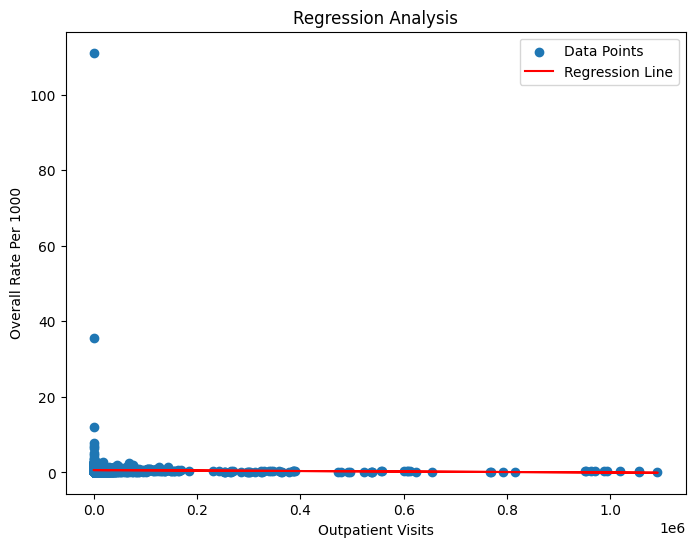

In [73]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into the variable df
# Replace column names if they differ from your actual dataset
independent_variable = 'Outpatient Visits'  # Numerical independent variable
dependent_variable = 'Overall Rate Per 1000'  # Numerical dependent variable

# Add a constant term to the independent variable matrix
X = sm.add_constant(df[independent_variable])

# Dependent variable
y = df[dependent_variable]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get regression summary
print(model.summary())

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[independent_variable], df[dependent_variable], label='Data Points')

# Plot the regression line
plt.plot(df[independent_variable], model.predict(X), color='red', label='Regression Line')

plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)
plt.title('Regression Analysis')
plt.legend()
plt.show()



## Interpretation
### Based on the regression analysis and the high p-value for the coefficient of outpatient visits, there is not enough evidence to reject the null hypothesis. The number of outpatient visits does not appear to be a significant predictor of the overall rate per 1000 related to healthcare in this dataset. The relationship between these variables is weak, and the number of outpatient visits alone does not provide a meaningful prediction of the overall rate per 1000.